# Pollutant Emissions from Transport

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# custom_palette = sns.color_palette("BuPu")
sns.set(palette="Set2")

### Reading Dataset
The dataset is in TSB format, thus we'll separate the values based on tabs

In [2]:
data_df = pd.read_csv('Dataset/t2020_rk300.tsv', sep='\t', header=0)

split_col = data_df[r'unit,src_nfr,airpol,geo\time'].str.split(',', expand=True)
new_cols = ['unit', 'src_nfr', 'airpol', 'geo']
for i in range(0, 4):
    data_df.insert(i, new_cols[i], split_col[i])
    
data_df.drop(columns=[r'unit,src_nfr,airpol,geo\time'], axis=1, inplace=True)

data_df.head()

,unit,src_nfr,airpol,geo,1990,1991,1992,1993,1994,1995,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,PC,SE1_RD_NRD,NMVOC,AT,317.9,303.2,261.4,225.7,198.3,174.4,...,55.1,50.3,48.0,44.2,41.2,39.0,36.8,35.7,33.5,32.2
1,PC,SE1_RD_NRD,NMVOC,BE,252.7,230.9,221.9,204.0,191.8,182.9,...,42.3,38.5,35.5,32.0,28.5,24.8,24.3,24.1,23.6,22.6
2,PC,SE1_RD_NRD,NMVOC,BG,214.8,107.1,129.7,146.9,142.5,150.4,...,56.6,55.4,49.0,46.6,46.1,40.6,40.9,41.6,38.0,32.8
3,PC,SE1_RD_NRD,NMVOC,CY,134.7,132.0,129.3,124.4,126.7,123.8,...,75.1,68.6,65.2,60.7,56.1,51.7,50.0,48.5,49.6,48.2
4,PC,SE1_RD_NRD,NMVOC,CZ,116.3,108.8,132.1,120.8,131.0,128.5,...,60.6,59.8,53.0,49.6,44.1,37.6,34.1,29.8,26.3,26.1


Data had spaces added to it thus we had to replace those and null values ':' with np.nan values.

In [4]:
data_df.columns = data_df.columns.str.replace(' ', '')
data_df.replace(to_replace=': ', value=np.nan, inplace=True)

cols = data_df.columns[4:]
data_df[cols] = data_df[cols].astype(float)

Replace Country codes with Country Names

In [5]:
data_df.replace({'geo': {
    'EU27_2020': 'EU (27 countries - from 2020)',
    'EU28': 'EU (28 countries)',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'CZ': 'Czechia',
    'DK': 'Denmark',
    'DE': 'Germany',
    'EE': 'Estonia',
    'IE': 'Ireland',
    'EL': 'Greece',
    'ES': 'Spain',
    'FR': 'France',
    'HR': 'Croatia',
    'IT': 'Italy',
    'CY': 'Cyprus',
    'LV': 'Latvia',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'HU': 'Hungary',
    'MT': 'Malta',
    'NL': 'Netherlands',
    'AT': 'Austria',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'FI': 'Finland',
    'SE': 'Sweden',
    'UK': 'United Kingdom',
    'IS': 'Iceland',
    'NO': 'Norway',
    'CH': 'Switzerland'
}}, inplace=True)

## Nitrogen Oxides

Nitrogen Oxides are a family of poisonous, highly reactive gases. These gases form when fuel is burned at high temperatures. NOx pollution is emitted by automobiles, trucks and various non-road vehicles (e.g., construction equipment, boats, etc.) as well as industrial sources such as power plants, industrial boilers, cement kilns, and turbines.

In [6]:
# Making a separate dataframe for rows where attribute 'airpol' had 'NOX' as value
nox_df = data_df[data_df['airpol'] == 'NOX'].copy()

#### Highest amount of Nitrogen Oxides Recorded between 1990 to 2017
Now, we'll observe highest amounts of NOX in air that was recorded in the given time span.

In [7]:
max_nox_year = nox_df.iloc[:, 4:].max(axis=0).idxmax(axis=1)
max_nox_country = data_df.iloc[nox_df.iloc[:, 4:].max(axis=1).idxmax(axis=0), 3]
max_nox = nox_df.iloc[:, 4:].max(axis=1).max()

print("In year {}, {} recorded highest amount of Nitrogen Oxides at {} in air".format(max_nox_year, max_nox_country, max_nox))

In year 1990, Lithuania recorded highest amount of Nitrogen Oxides at 191.5 in air


### Hightest to Lowest amounts of Nitrogen Oxides in 2017

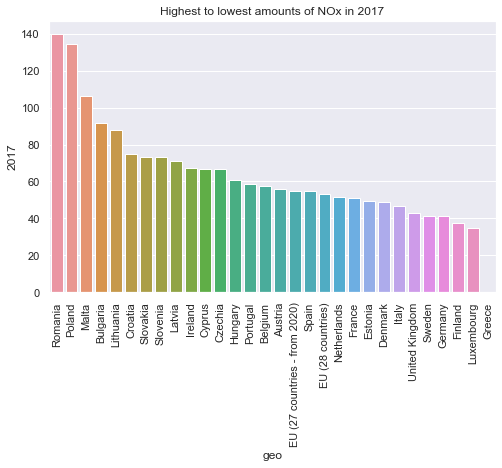

In [7]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.xticks(rotation=90)
plt.title('Highest to lowest amounts of NOx in 2017')
plt.xlabel('Countries')
plt.ylabel('NOx')
sns.barplot(data=nox_df.sort_values(by='2017',ascending=False), x='geo', y='2017')
# ax.set(xlabel='Country', ylabel='NOx in 2017')
plt.plot(x=)

### Countries with Highest amount of Nitrogen Oxide in 2017

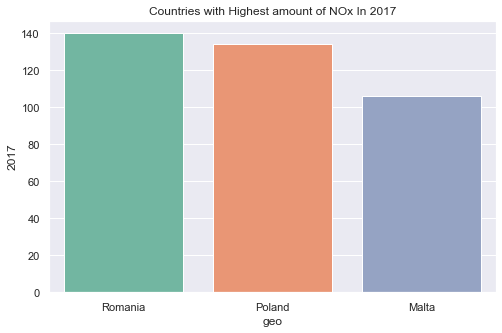

In [8]:
plt.title('Countries with Highest amount of NOx In 2017')

sns.barplot(data=nox_df.sort_values(by='2017',ascending=False).head(3), x='geo', y='2017')

In [9]:
nox_df.sort_values(by='2017',ascending=False).head(3)[['geo', '2017']]

,geo,2017
55,Romania,140.0
53,Poland,134.4
51,Malta,106.4


### Countries with Lowest amount of Nitrogen Oxide in 2017

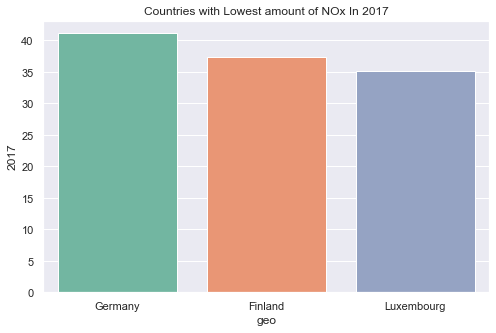

In [10]:
plt.title('Countries with Lowest amount of NOx In 2017')
sns.barplot(data=nox_df.sort_values(by='2017',ascending=False).dropna(subset=['2017']).tail(3), x='geo', y='2017')

In [11]:
nox_df.sort_values(by='2017',ascending=False).dropna(subset=['2017']).tail(3)[['geo', '2017']]

,geo,2017
35,Germany,41.1
42,Finland,37.4
49,Luxembourg,35.1


#### Analysis over time

Now, we'll see how the median value of amounts of NOx has changed over years across all the countries combined

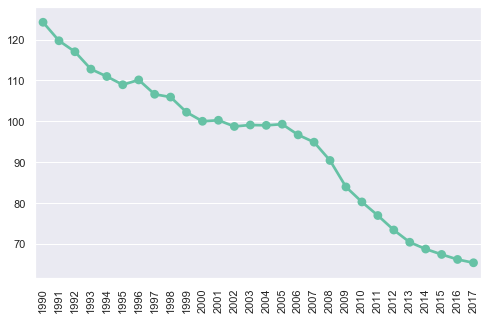

In [12]:
plt.xticks(rotation=90)
nox_amount = nox_df.mean()
sns.pointplot(x=nox_amount.index, y=nox_amount)

Now, let's check the percentage change over time

In [13]:
change = ((nox_amount['1990']  - nox_amount['2017']) / nox_amount['1990']) * 100
print("Percentage change over time", change)

Percentage change over time 47.39938939772412


We can clearly notice how the amounts have reduced over the years. Upon researching a bit it was found that in *year 1990,* _The Clean Air Act Amendments_ were passed. The Clean Air Act Amendments of 1990 required major stationary sources of NOx to install and operate reasonably available control technology (RACT) by May 31, 1995. All of the New England States have developed and implemented NOx RACT regulations. Region-wide, these regulations have reduced NOx from stationary sources by more than 50% from 1990 levels.

src: https://www3.epa.gov/region1/airquality/nox.html

### Non-Methane Volatile Organic Compounds

In [14]:
nmv_df = data_df[data_df['airpol'] == 'NMVOC']

In [15]:
max_nmv_year = nmv_df.iloc[:, 4:].max(axis=0).idxmax(axis=1)
max_nmv_country = data_df.iloc[nmv_df.iloc[:, 4:].max(axis=1).idxmax(axis=0), 3]
print("In year {}, {} recorded highest amount of Non-Methan Volatile Organic Compounds in air".format(max_nmv_year, max_nmv_country))

In year 1990, Germany recorded highest amount of Non-Methan Volatile Organic Compounds in air


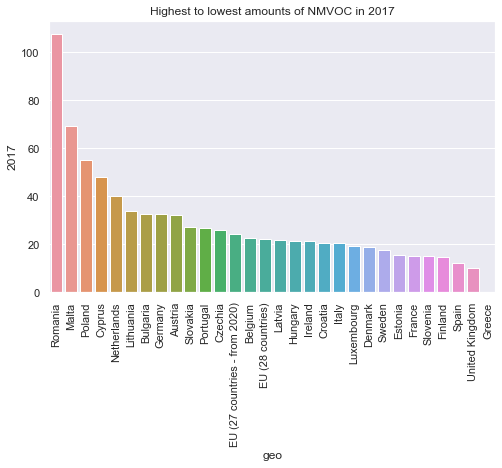

In [16]:
plt.xticks(rotation=90)

plt.title('Highest to lowest amounts of NMVOC in 2017')
sns.barplot(data=nmv_df.sort_values(by='2017',ascending=False), x='geo', y='2017')

### Top 3 countries with Highest amount of Non-Methane Volatile Organic Compounds IN 2017

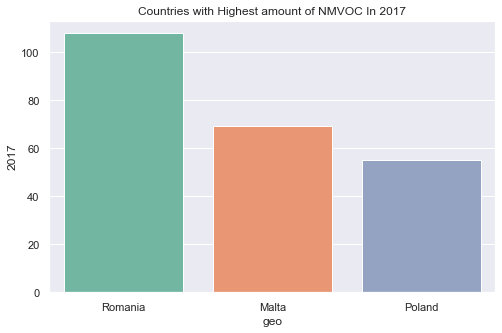

In [17]:
plt.title('Countries with Highest amount of NMVOC In 2017')
sns.barplot(data=nmv_df.sort_values(by='2017',ascending=False).head(3), x='geo', y='2017')

In [18]:
nmv_df.sort_values(by='2017',ascending=False).head(3)[['geo', '2017']]

,geo,2017
25,Romania,107.7
21,Malta,69.3
23,Poland,55.0


### Countries with Lowest amount of Non-Methane Volatile Organic Compounds In 2017

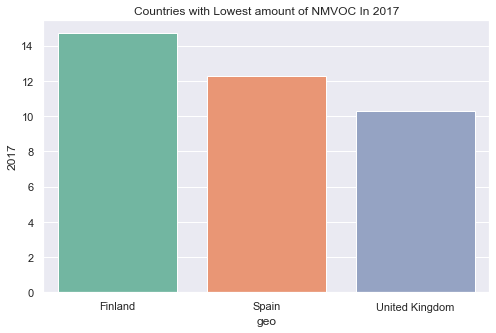

In [19]:
plt.title('Countries with Lowest amount of NMVOC In 2017')
sns.barplot(data=nmv_df.sort_values(by='2017',ascending=False).dropna(subset=['2017']).tail(3), x='geo', y='2017')

In [20]:
nmv_df.sort_values(by='2017',ascending=False).tail(3)[['geo', '2017']]

,geo,2017
9,Spain,12.3
29,United Kingdom,10.3
8,Greece,NaN


#### Analysis over time

Now, we'll see how the median value of amounts of NMVOC has changed over years across all the countries combined

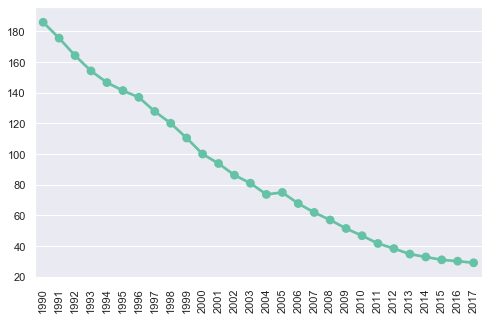

In [21]:
plt.xticks(rotation=90)
nmv_amount = nmv_df.mean()
sns.pointplot(x=nmv_amount.index, y=nmv_amount)

Now, let's check the percentage change over time

In [22]:
change = ((nmv_amount['1990']  - nmv_amount['2017']) / nmv_amount['1990']) * 100
print("Percentage change over time", change)

Percentage change over time 84.32282003710576


- EEA-33 emissions of non-methane volatile organic compounds (NMVOCs) have decreased by 57% since 1990. In 2011, the most significant sources of NMVOC emissions were 'Solvent and product use' (43%), comprising activities such as paint      application, dry-cleaning and other use of solvents, followed by 'Commercial, institutional and households' (17%).
- The decline in emissions since 1990 has primarily been due to reductions achieved in the road transport sector by tighter vehicle emission standards, combined with limits on the maximum volatility of petrol that can be sold in EU Member States. The reductions in NMVOC emissions have been enhanced by the switching from petrol to diesel cars in some EU countries. Reductions have also occurred in the 'Solvents and product use' sector as a result of the introduction of legislative measures limiting the use and emissions of solvents.

src: https://www.eea.europa.eu/data-and-maps/indicators/eea-32-non-methane-volatile-1/assessment-4

### Particulates

In [23]:
pm10_df = data_df[data_df['airpol'] == 'PM10']

In [24]:
max_pm10_year = pm10_df.iloc[:, 4:].max(axis=0).idxmax(axis=1)
max_pm10_country = data_df.iloc[pm10_df.iloc[:, 4:].max(axis=1).idxmax(axis=0), 3]
max_pm10 = pm10_df.iloc[:, 4:].max(axis=1).max()

print("In year {}, {} recorded highest amount of Particulates > 10mn at {} in air".format(max_pm10_year, max_pm10_country, max_pm10))

In year 2017, Romania recorded highest amount of Particulates > 10mn at 308.5 in air


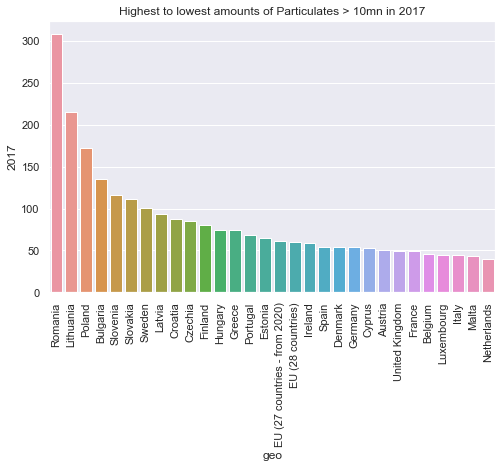

In [25]:
plt.xticks(rotation=90)
plt.title('Highest to lowest amounts of Particulates > 10mn in 2017')
sns.barplot(data=pm10_df.sort_values(by='2017',ascending=False), x='geo', y='2017')

### Countries with Highest amount of Particulates In 2017

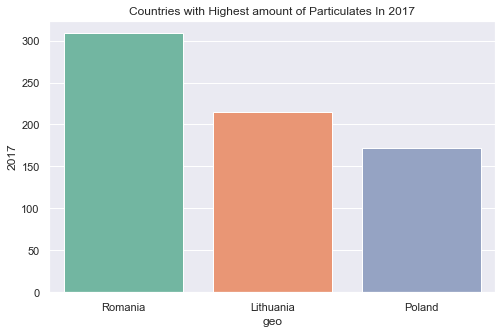

In [26]:
plt.title('Countries with Highest amount of Particulates In 2017')
sns.barplot(data=pm10_df.sort_values(by='2017',ascending=False).head(3), x='geo', y='2017')

In [27]:
pm10_df.sort_values(by='2017',ascending=False).head(3)[['geo', '2017']]

,geo,2017
85,Romania,308.5
78,Lithuania,215.1
83,Poland,172.0


### Countries with Highest amount of Particulates In 2017

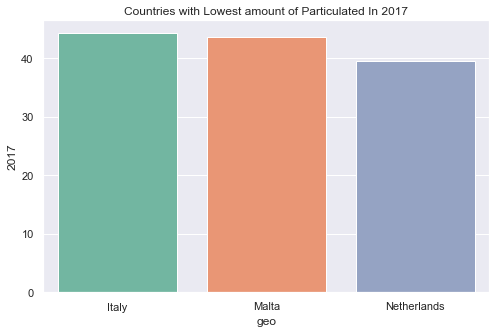

In [28]:
plt.title('Countries with Lowest amount of Particulated In 2017')
sns.barplot(data=pm10_df.sort_values(by='2017',ascending=False).tail(3), x='geo', y='2017')

In [29]:
pm10_df.sort_values(by='2017',ascending=False).tail(3)[['geo', '2017']]

,geo,2017
77,Italy,44.2
81,Malta,43.6
82,Netherlands,39.5


#### Analysis over time

Now, we'll see how the median value of amounts of NMVOC has changed over years across all the countries combined

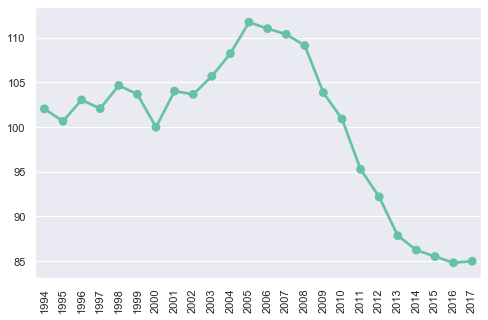

In [30]:
plt.xticks(rotation=90)
pm10_amount = pm10_df.mean()
sns.pointplot(x=pm10_amount.index[4:], y=pm10_amount[4:])

Note: The graph is based upon the median values only.

Now, let's check the percentage change over time

In [31]:
change = ((pm10_amount['1990']  - pm10_amount['2017']) / pm10_amount['1990']) * 100
print("Percentage change over time", change)

Percentage change over time 22.135702943691236



- Total emissions of primary sub-10µm particulate matter (PM10) have reduced by 24% across the EEA-33 region between 1990 and 2011.
- Of this reduction in PM10 emissions, % has taken place in the 'Energy Production and Distribution' sector due to factors including the fuel-switching from coal to natural gas for electricity generation and improvements in the performance of pollution abatement equipment installed at industrial facilities.

src: https://www.eea.europa.eu/data-and-maps/indicators/emissions-of-primary-particles-and-5/assessment-3

## Reformating Dataframe

In [32]:
# Depivoting the data for ease of further analysis
# Coverted column headers (1990-2017) into a new attribute year

ref_data_df = data_df.melt(id_vars=['geo', 'airpol'],value_vars=data_df.columns[4:], var_name='year', value_name='pol_level')
ref_data_df

,geo,airpol,year,pol_level
0,Austria,NMVOC,1990,317.9
1,Belgium,NMVOC,1990,252.7
2,Bulgaria,NMVOC,1990,214.8
3,Cyprus,NMVOC,1990,134.7
4,Czechia,NMVOC,1990,116.3
5,Germany,NMVOC,1990,398.1
6,Denmark,NMVOC,1990,157.4
7,Estonia,NMVOC,1990,171.2
8,Greece,NMVOC,1990,NaN
9,Spain,NMVOC,1990,159.3


### Relationship between different pollutants and Analysis over time

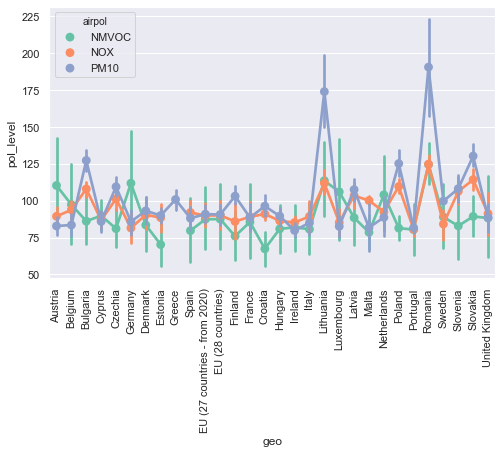

In [33]:
plt.xticks(rotation=90)
sns.pointplot(x='geo', y='pol_level', hue='airpol', data=ref_data_df)

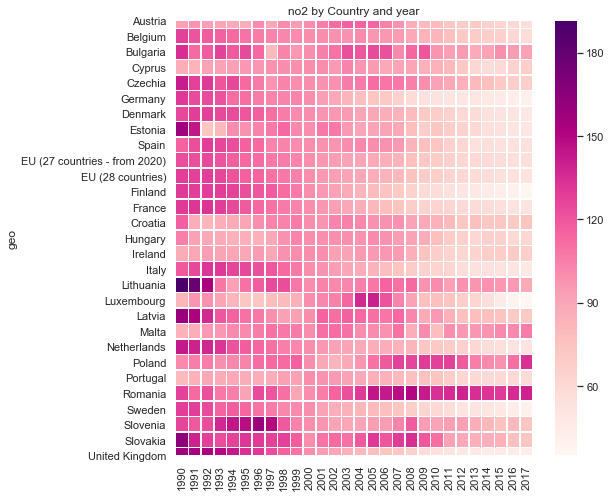

In [34]:
nox_data_df = nox_df.drop(columns=['unit', 'src_nfr', 'airpol'], axis=1)
nox_data_df = nox_data_df.dropna(how='any')
nox_data_df.set_index('geo', inplace=True)
nox_data_df
f, ax = plt.subplots(figsize=(8,8))
ax.set_title('{} by Country and year'.format('no2'))
sns.heatmap(nox_data_df, cmap="RdPu", linewidths=.5, ax=ax)

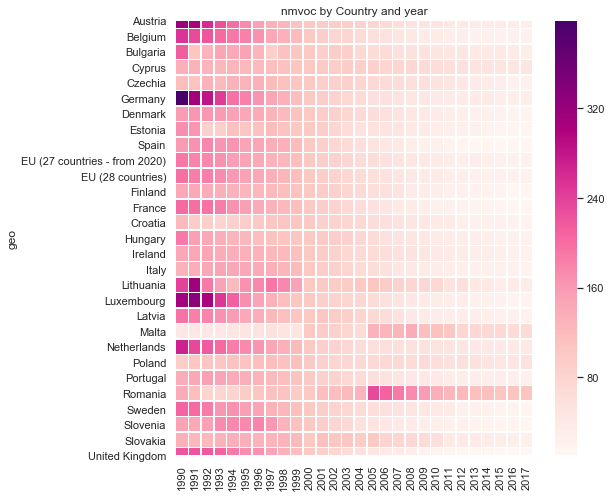

In [35]:
nmv_data_df = nmv_df.drop(columns=['unit', 'src_nfr', 'airpol'], axis=1)
nmv_data_df = nmv_data_df.dropna(how='any')
nmv_data_df.set_index('geo', inplace=True)
nmv_data_df
f, ax = plt.subplots(figsize=(8,8))
ax.set_title('{} by Country and year'.format('nmvoc'))
sns.heatmap(nmv_data_df, cmap="RdPu", linewidths=.5, ax=ax)

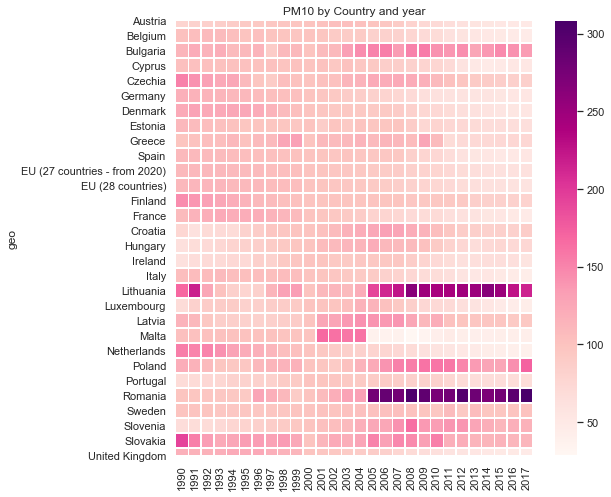

In [36]:
pm10_data_df = pm10_df.drop(columns=['unit', 'src_nfr', 'airpol'], axis=1)
pm10_data_df = pm10_data_df.dropna(how='any')
pm10_data_df.set_index('geo', inplace=True)
pm10_data_df
f, ax = plt.subplots(figsize=(8,8))
ax.set_title('{} by Country and year'.format('PM10'))
sns.heatmap(pm10_data_df, cmap="RdPu", linewidths=.5, ax=ax)